In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import os
import pandas
import pynumdiff
import scipy.fftpack
from IPython.display import display,SVG
import figurefirst
fifi = figurefirst

In [11]:
def get_gamma(dt, freq, timeseries_length=None):
    try:
        if dt == 0.1:
            log_g = np.log(freq)*(-1.5) -4
        if dt == 0.01:
            log_g = np.log(freq)*(-1.5) -1.8
        if dt == 0.001:
            log_g = np.log(freq)*(-1.5) -1.2
            
        return np.exp(log_g)
    
    except:
        log_gs = []
        for f in freq:
            if dt == 0.1:
                log_gs.append(np.log(freq)*(-1.5) -4) 
            if dt == 0.01:
                log_gs.append(np.log(freq)*(-1.5) -1.8) 
            if dt == 0.001:
                log_gs.append(np.log(freq)*(-1.5) -1.2) 
            
        return np.exp(np.array(log_gs))
            


In [12]:
dataframe = pandas.read_hdf('fly_walking_trajectory.hdf5')

In [13]:
fly_ypos = np.ravel((dataframe.y/6.)[0:])
t = np.ravel(dataframe.t[0:])
t -= t[0]
dt = np.mean(np.diff(t))

In [20]:
figure_layout = 'fig_7_fly.svg'
cutoff_freq = 1e-1

In [21]:
np.max(t)

499.9741322994232

# Data

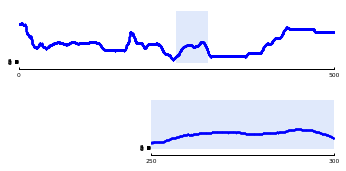

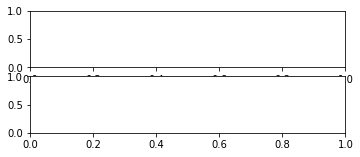

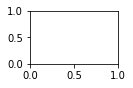

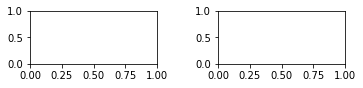

In [25]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])

ax = layout.axes[('data', 'data')]

ax.plot(t, fly_ypos, '.', color='blue', markersize=1, zorder=-10)
ax.fill_between([250, 300], 0, 100, edgecolor='none', facecolor='cornflowerblue', alpha=0.2, zorder=-20)

ax.set_rasterization_zorder(0)
ax.set_xlim(0, 500)
#ax.set_ylim(0, 5)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [0, 1,2,3,4,5],
                                 xticks = [0, 500],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})


ax = layout.axes[('data', 'data_zoom')]

ax.plot(t, fly_ypos, '.', color='blue', markersize=1, zorder=-10)
ax.fill_between([250, 300], 0, 100, edgecolor='none', facecolor='cornflowerblue', alpha=0.2, zorder=-20)

ax.set_rasterization_zorder(0)
ax.set_xlim(250, 300)
#ax.set_ylim(0, 5)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [0, 1,2,3,4,5],
                                 xticks = [250, 300],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)

layout.append_figure_to_layer(layout.figures['data'], 'data', cleartarget=True)
layout.write_svg(figure_layout)

# Spectra

In [25]:
def plot_power_spectra(x, t, cutoff_freq=None, ax=None):
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        
    ax.set_yscale('log')
    ax.set_xscale('log')
        
    yf = scipy.fftpack.fft(x)
    N = len(t)
    dt = np.mean(np.diff(t))
    xf = np.linspace(0.0, 1.0/(2.0*dt), N/2)
    
    P = 2.0/N * np.abs(yf[:N//2])
    ax.plot(xf, P, color='black', zorder=-10)
    
    if cutoff_freq is not None:
        ax.vlines(cutoff_freq, 1e-6, 1e1, color='red')

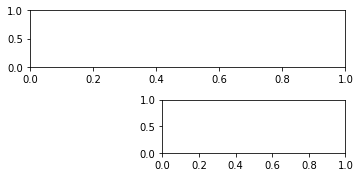

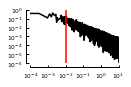

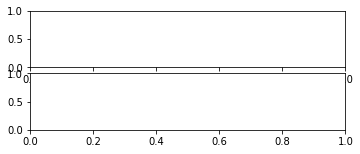

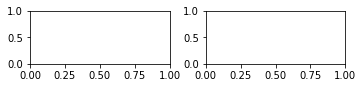

In [26]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])

ax = layout.axes[('spectra', 'spectra')]
plot_power_spectra(fly_ypos, t, cutoff_freq=cutoff_freq, ax=ax)

ax.set_ylim(1e-6, 1e0)
ax.set_xlim(1e-4, 1e1)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 xticks=[1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1], 
                                 yticks=[1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)


layout.append_figure_to_layer(layout.figures['spectra'], 'spectra', cleartarget=True)
layout.write_svg(figure_layout)

In [27]:
dt = np.mean(np.diff(t))
print('dt: ', dt)
idx = np.where( (t>2500)*(t<2700) )[0]
data_zoom = fly_ypos[idx]

dt:  0.03136922689701064


/home/caveman/BMD2/lib/python3.5/site-packages/pandas/core/computation/expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [12]:
tvgamma = get_gamma(0.01, cutoff_freq)
print(tvgamma)

165.29888822158654


In [13]:
method = 'savgoldiff'
method_parent = 'linear_model'

params, v = pynumdiff.optimize.__dict__[method_parent].__dict__[method](data_zoom, dt, tvgamma=tvgamma)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is depre

In [14]:
x_smooth, xdot_smooth = pynumdiff.__dict__[method_parent].__dict__[method](fly_ypos, dt, params)

/home/caveman/BMD2/lib/python3.5/site-packages/scipy-1.1.0-py3.5-linux-x86_64.egg/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


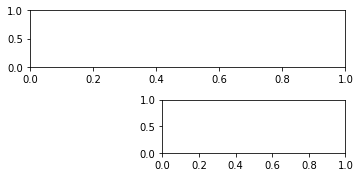

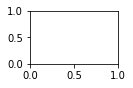

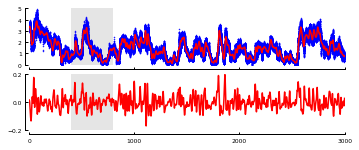

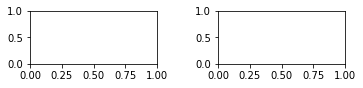

In [32]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])

ax = layout.axes[('smooth', 'pos')]

ax.fill_between([400, 800], 0, 5, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)
ax.plot(t, fly_ypos, '.', color='blue', markersize=1, zorder=-10)
ax.set_rasterization_zorder(0)
ax.plot(t, x_smooth, color='red')

ax.set_xlim(0, 3000)
ax.set_ylim(0, 5)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [0, 1,2,3,4,5],
                                 xticks = [0, 1000, 2000, 3000],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})
ax.set_xticklabels([])

ax = layout.axes[('smooth', 'vel')]

ax.plot(t, xdot_smooth, color='red')
ax.fill_between([400, 800], -0.2, 0.2, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)

ax.set_xlim(0, 3000)
ax.set_ylim(-.2, .2)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [-0.2, 0, 0.2],
                                 xticks = [0, 1000, 2000, 3000],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)

layout.append_figure_to_layer(layout.figures['smooth'], 'smooth', cleartarget=True)
layout.write_svg(figure_layout)

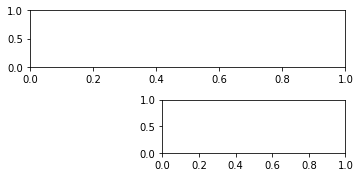

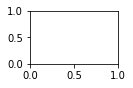

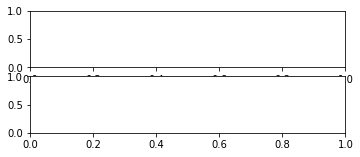

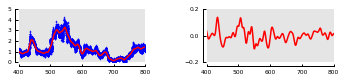

In [33]:
layout = fifi.svg_to_axes.FigureLayout(figure_layout, autogenlayers=True, 
                                           make_mplfigures=True, hide_layers=[])

ax = layout.axes[('smooth_zoom', 'pos')]

ax.plot(t, fly_ypos, '.', color='blue', markersize=1, zorder=-10)
ax.set_rasterization_zorder(0)
ax.plot(t, x_smooth, color='red')
ax.fill_between([400, 800], 0, 5, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)

ax.set_xlim(400, 800)
ax.set_ylim(0, 5)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [0, 1,2,3,4,5],
                                 xticks = [400, 500, 600, 700, 800],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})


ax = layout.axes[('smooth_zoom', 'vel')]

ax.plot(t, xdot_smooth, color='red')
ax.fill_between([400, 800], -0.2, 0.2, edgecolor='none', facecolor='gray', alpha=0.2, zorder=-20)

ax.set_xlim(400, 500)
ax.set_ylim(-0.2, 0.2)
fifi.mpl_functions.adjust_spines(ax, ['left', 'bottom'], 
                                 yticks = [-0.2, 0, 0.2],
                                 xticks = [400, 500, 600, 700, 800],
                                 tick_length=2.5,
                                 spine_locations={'left': 4, 'bottom': 4})

fifi.mpl_functions.set_fontsize(ax, 6)

layout.append_figure_to_layer(layout.figures['smooth_zoom'], 'smooth_zoom', cleartarget=True)
layout.write_svg(figure_layout)